In [1]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

In [2]:
# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [3]:
# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

In [4]:
# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
std=0.01:2.3024728931320873
Xavier:2.278905145676517
He:2.375052756065323
===========iteration:100===========
std=0.01:2.3032174586296543
Xavier:2.2551998908447386
He:1.6791641758061713
===========iteration:200===========
std=0.01:2.301073585656236
Xavier:2.0964637861370607
He:0.8119825318701978
===========iteration:300===========
std=0.01:2.3017733578702
Xavier:1.786788128917285
He:0.6092940331847387
===========iteration:400===========
std=0.01:2.3038075612108777
Xavier:1.3837746974141685
He:0.659300757051595
===========iteration:500===========
std=0.01:2.301939082726434
Xavier:1.0611092358246967
He:0.5044045495246197
===========iteration:600===========
std=0.01:2.3015624900713503
Xavier:0.6977978609473412
He:0.3653032057287816
===========iteration:700===========
std=0.01:2.3028467378517856
Xavier:0.5706985678149337
He:0.24706566944561054
===========iteration:800===========
std=0.01:2.29745665556148
Xavier:0.5586058774376417
He:0.3437684009214177
====

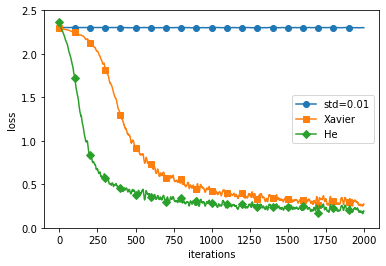

In [5]:
# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()